## Exploratory Data Analysis
1. Analysis

- Univariate Analysis

- Multivariate Analysis

2. Feature Engineering

- Creating new columns

- Modifying existing ones

3. Handling Outliers

- Detect Outliers

- Remove Outliers

## The entire process is highly iterative

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Categorical Columns
- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked
## Numerical Columns
- Age
- Fare
- PassengerId
## Mixed Columns
- Name
- Ticket
- Cabin

In [22]:
# checking missing value
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [15]:
df.drop(columns = ['Cabin'], inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [19]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
# S it is

df['Embarked'].fillna('S', inplace=True)

In [23]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Changing data type for the following cols
- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [26]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [28]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 62% people died in the accident


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


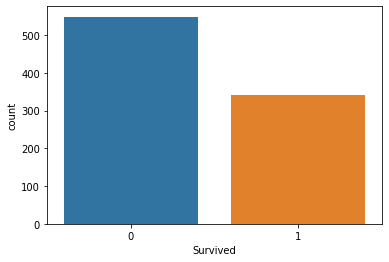

In [31]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {}% people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

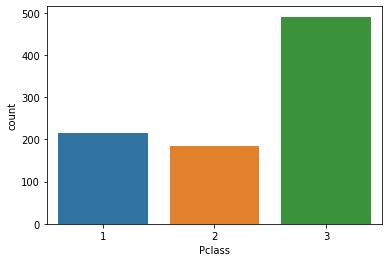

In [36]:
# Pclass column

print(df['Pclass'].value_counts(normalize=True)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass was the most crowded class

male      64.758698
female    35.241302
Name: Sex, dtype: float64


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

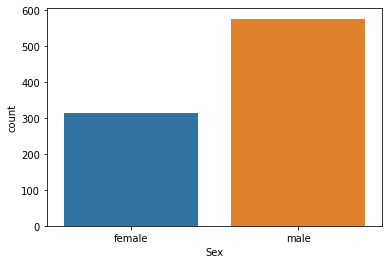

In [38]:
print(df['Sex'].value_counts(normalize=True)*100)

sns.countplot(df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

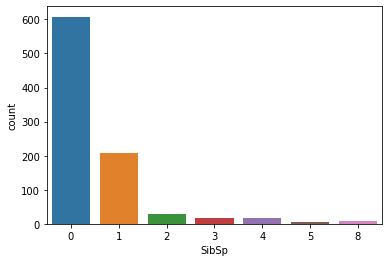

In [39]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

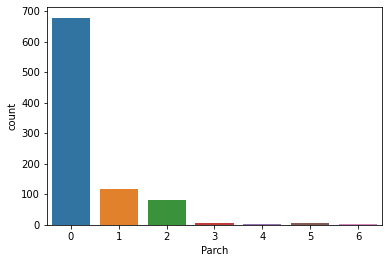

In [40]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

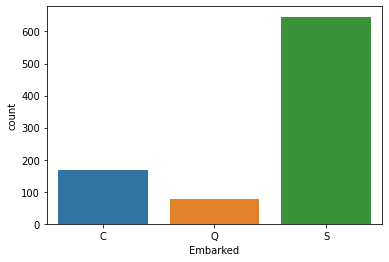

In [41]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


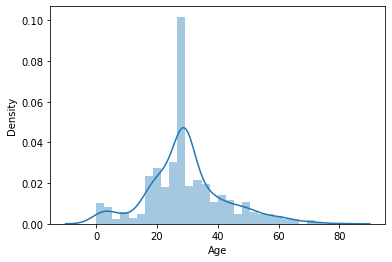

In [42]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

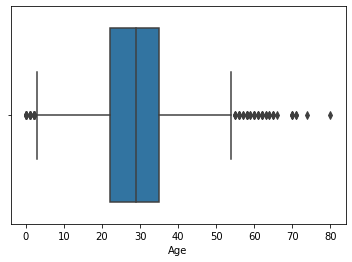

In [43]:
sns.boxplot(df['Age'])

In [45]:
df['Age'].max()

80

In [44]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


### Conclusion
- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

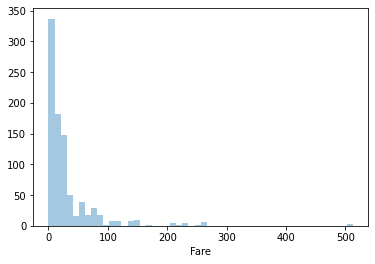

In [49]:
# Fare column

sns.distplot(df['Fare'],kde=False)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

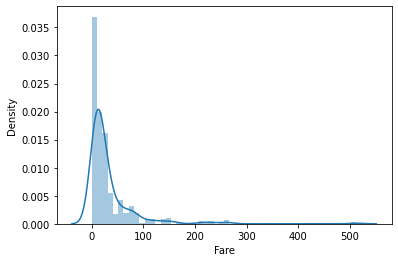

In [50]:
sns.distplot(df['Fare'])

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

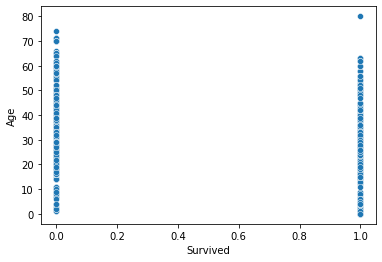

In [48]:
sns.scatterplot(df['Survived'],df['Age'])

In [51]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

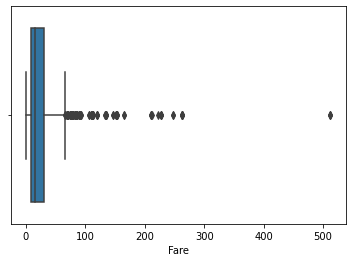

In [52]:
sns.boxplot(df['Fare'])

In [53]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


## Conclusion
- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


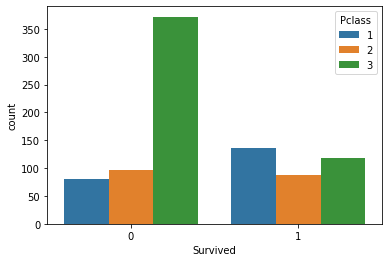

In [54]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(df['Survived'], hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


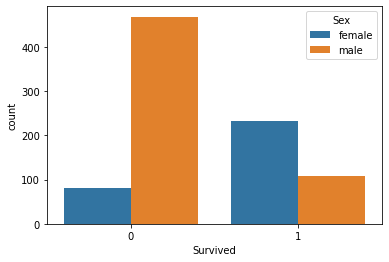

In [55]:
# Survival with Sex

sns.countplot(df['Survived'], hue=df['Sex'])

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


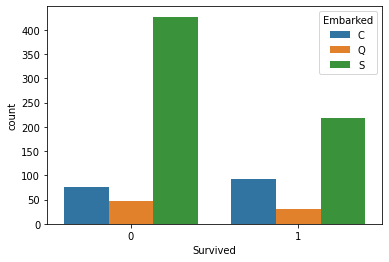

In [56]:
# Survival with Embarked

sns.countplot(df['Survived'], hue=df['Embarked'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/neosoft/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

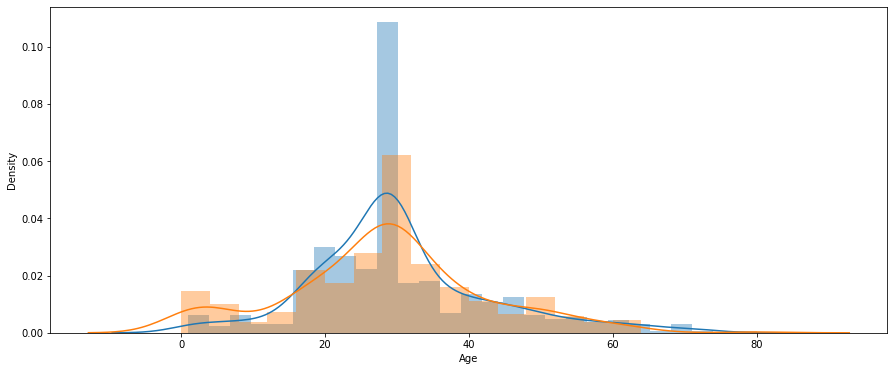

In [57]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

/home/neosoft/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/neosoft/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

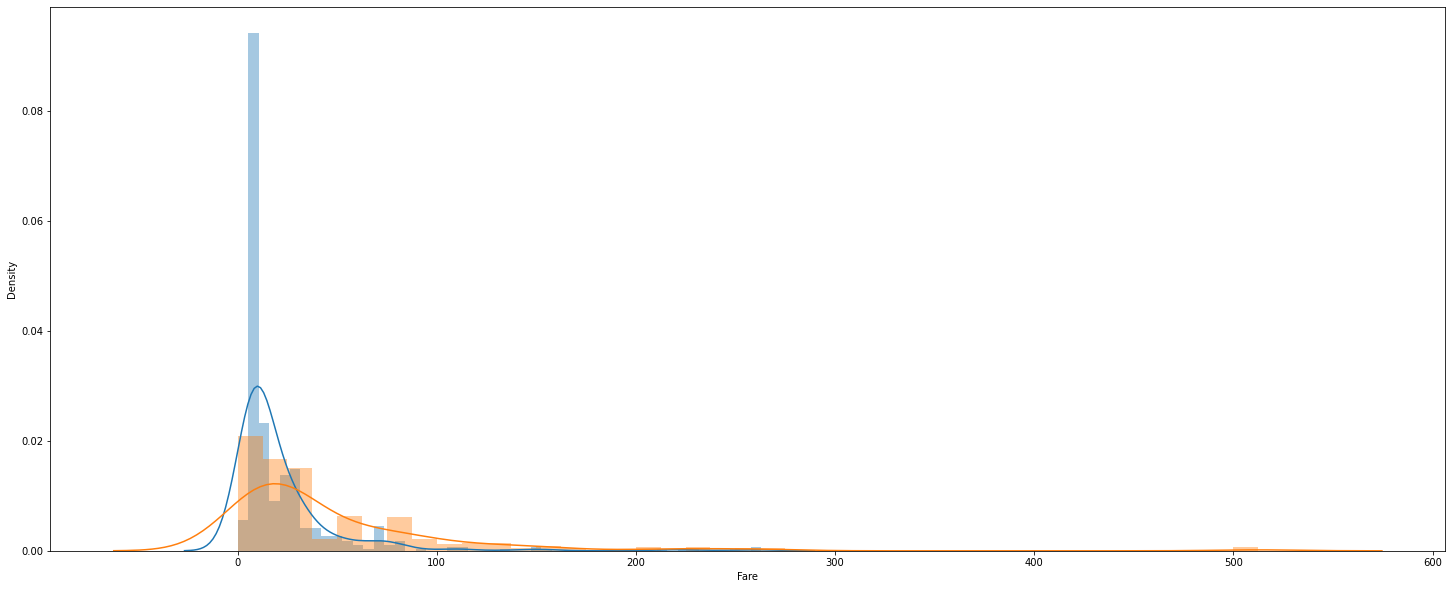

In [61]:
# Survived with Fare

plt.figure(figsize=(25,10))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

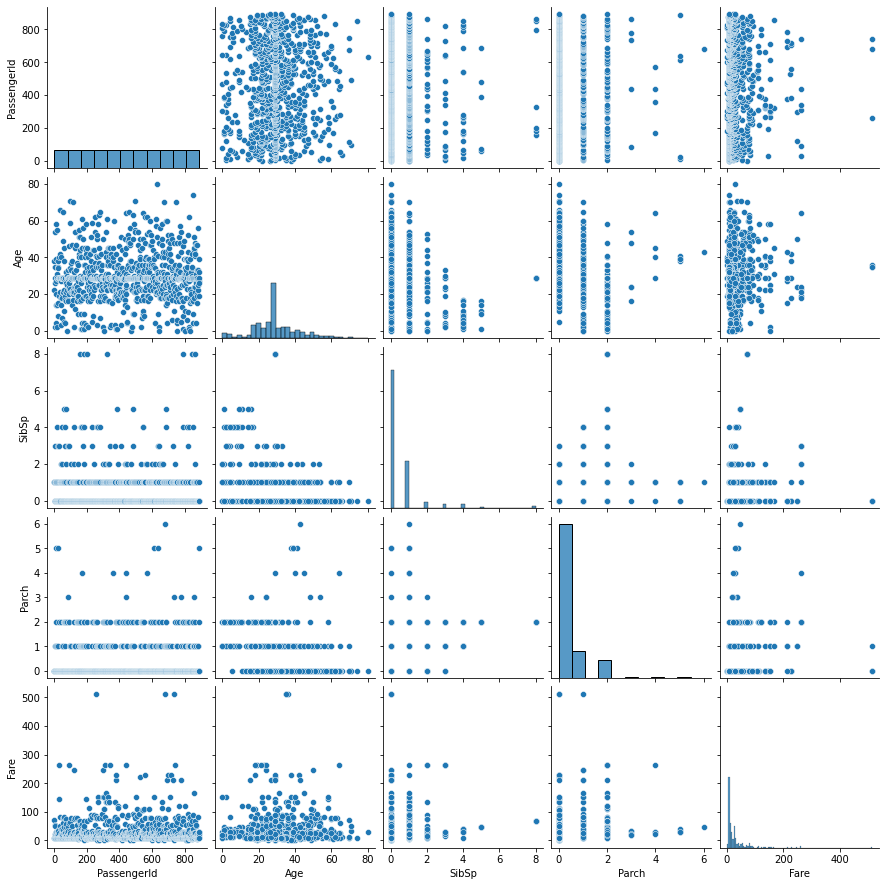

In [62]:
sns.pairplot(df)

<AxesSubplot:>

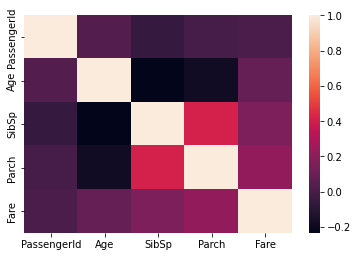

In [63]:
sns.heatmap(df.corr())

In [64]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [65]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
680,681,0,3,"Peters, Miss. Katie",female,29,0,0,330935,8.1375,Q,0
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51,0,0,347064,7.7500,S,0
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21,2,2,W./C. 6608,34.3750,S,4
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21,0,0,A/4. 39886,7.8000,S,0
176,177,0,3,"Lefebre, Master. Henry Forbes",male,29,3,1,4133,25.4667,S,4


In [66]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [67]:
df['family_type']=df['family_size'].apply(family_type)

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Alone


In [69]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [70]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51,347743,7.0542,S,Alone
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45,111428,26.5500,S,Alone
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30,364516,12.4750,S,Alone
869,870,1,3,"Johnson, Master. Harold Theodor",male,4,347742,11.1333,S,Medium
544,545,0,1,"Douglas, Mr. Walter Donald",male,50,PC 17761,106.4250,C,Medium


In [71]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detecting outliers
## Numerical Data
- if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 IQR and Q3 + 1.5 IQR
# Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [72]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [73]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [76]:
#One hot encoding

#df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


<AxesSubplot:>

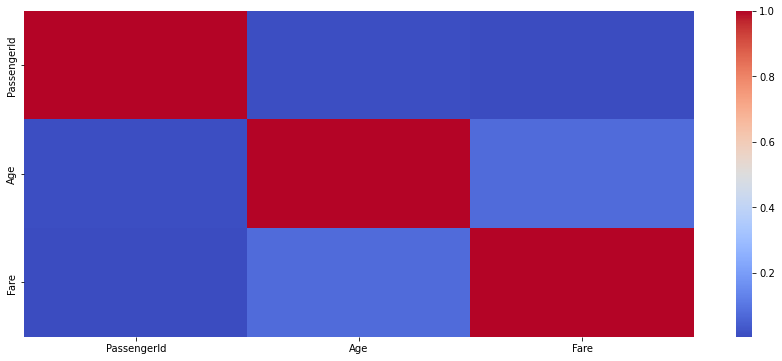

In [78]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='coolwarm')

# Drawing Conclusions
- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

# Communicating Results
- We can write a report/blog etc
- We can give a PPT in front of others
- We can describe the results face to face